Pierwsze rekordy danych:
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

Rozkład klas:
Category
ham     4825
spam     747
Name: count, dtype: int64


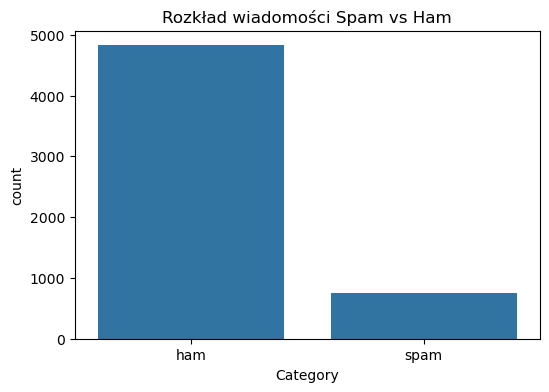


Ocena modelu:
Dokładność (accuracy): 0.98
Precyzja (precision): 1.00
Czułość (recall): 0.83

Raport klasyfikacji:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       966
        spam       1.00      0.83      0.90       149

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



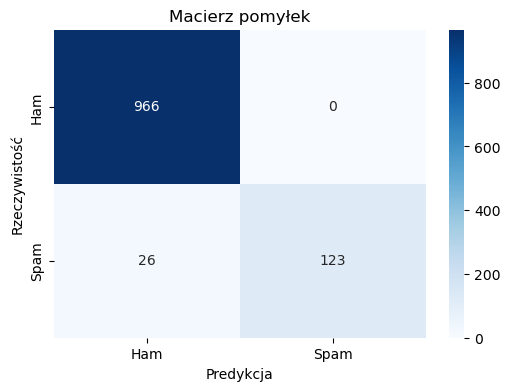

In [8]:
# Importowanie niezbędnych bibliotek
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytanie danych
data = pd.read_csv('email.csv')

data = data[data['Category'].isin(['ham', 'spam'])]

# Eksploracja danych
print("Pierwsze rekordy danych:")
print(data.head())
print("\nRozkład klas:")
print(data['Category'].value_counts())

# Wizualizacja rozkładu klas
plt.figure(figsize=(6, 4))
sns.countplot(x='Category', data=data)
plt.title('Rozkład wiadomości Spam vs Ham')
plt.show()

# Przetwarzanie wstępne: zamiana tekstu na małe litery
data['Message'] = data['Message'].str.lower()

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    data['Message'], 
    data['Category'], 
    test_size=0.2, 
    random_state=42
)

# Wektoryzacja TF-IDF
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,  # Ograniczenie liczby cech
    stop_words='english',  # Usunięcie popularnych angielskich słów
    ngram_range=(1, 2)  # Uwzględnienie pojedynczych słów i par słów
)

# Transformacja danych treningowych
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transformacja danych testowych
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Inicjalizacja i trenowanie klasyfikatora Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Predykcje
y_pred = nb_classifier.predict(X_test_tfidf)

# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')

print("\nOcena modelu:")
print(f"Dokładność (accuracy): {accuracy:.2f}")
print(f"Precyzja (precision): {precision:.2f}")
print(f"Czułość (recall): {recall:.2f}")

# Raport klasyfikacji
print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_pred))

# Macierz pomyłek
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Ham', 'Spam'], 
            yticklabels=['Ham', 'Spam'])
plt.xlabel('Predykcja')
plt.ylabel('Rzeczywistość')
plt.title('Macierz pomyłek')
plt.show()

